In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import peakutils
import math
#from moviepy.editor import *
import cv2
import scipy.stats as stats
#important for text to be detected when importing saved figures into illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure S10"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
statspath = os.path.join(rootpath,"stats")
for x in [figurepath,datapath,metapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

# Home cage analysis

In [3]:
# Read the data containing the number of behavior events.
homecage_summary_df = pd.read_csv(os.path.join(datapath,"homecage_summary_df.csv"),index_col = None)

In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

## Figure S10C

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\1966657781.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


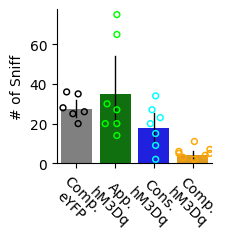

In [5]:
variable = 'Sniff_event'
figure_key = 'S10C'

fig,axs = plt.subplots(1,1,figsize = (2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
            palette = ['gray','green','blue','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
        facecolors='none',palette = ['black','lime','cyan','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Sniff')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Comp.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Comp.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Comp.\neYFP','App.\nhM3Dq','Cons.\nhM3Dq','Comp.\nhM3Dq'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [6]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
app = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Appetitive_hM3Dq',variable].values
cons = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Consummatory_hM3Dq',variable].values
comp = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values


statistic_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cons,cnt_cons_p = stats.mannwhitneyu(cnt,cons)
statistic_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)

#__,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_cons_p,cnt_comp_p,]
statistics = [statistic_app,statistic_cons,statistic_comp]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Consummatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = homecage_summary_df.loc[homecage_summary_df.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Sniff_event
Control vs Appetitive, 1.0, False
Control vs Consummatory, 0.2581319647658448, False
Control vs Post_ejaculatory, 0.007164171072727588, True
#####


# Figure S10D

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\348072022.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,


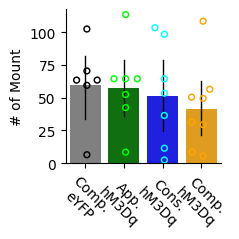

In [7]:
variable = 'Mount_event'
figure_key = 'S10D'

fig,axs = plt.subplots(1,1,figsize = (2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
            palette = ['gray','green','blue','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
        facecolors='none',palette = ['black','lime','cyan','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Mount')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Comp.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Comp.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Comp.\neYFP','App.\nhM3Dq','Cons.\nhM3Dq','Comp.\nhM3Dq'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [8]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
app = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Appetitive_hM3Dq',variable].values
cons = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Consummatory_hM3Dq',variable].values
comp = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values


statistic_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cons,cnt_cons_p = stats.mannwhitneyu(cnt,cons)
statistic_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)

#__,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_cons_p,cnt_comp_p,]
statistics = [statistic_app,statistic_cons,statistic_comp]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Consummatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = homecage_summary_df.loc[homecage_summary_df.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Mount_event
Control vs Appetitive, 1.0, False
Control vs Consummatory, 1.0, False
Control vs Post_ejaculatory, 0.41161697927903484, False
#####


# Figure S10E

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\123329730.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


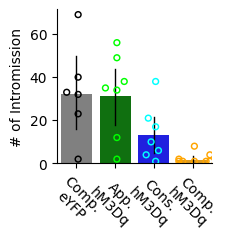

In [9]:
variable = 'Intromission_event'
figure_key = 'S10E'

fig,axs = plt.subplots(1,1,figsize = (2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
            palette = ['gray','green','blue','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
        facecolors='none',palette = ['black','lime','cyan','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Intromission')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Comp.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Comp.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Comp.\neYFP','App.\nhM3Dq','Cons.\nhM3Dq','Comp.\nhM3Dq'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [10]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
app = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Appetitive_hM3Dq',variable].values
cons = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Consummatory_hM3Dq',variable].values
comp = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values


statistic_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cons,cnt_cons_p = stats.mannwhitneyu(cnt,cons)
statistic_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)

#__,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_cons_p,cnt_comp_p,]
statistics = [statistic_app,statistic_cons,statistic_comp]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Consummatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = homecage_summary_df.loc[homecage_summary_df.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Intromission_event
Control vs Appetitive, 1.0, False
Control vs Consummatory, 0.30419580419580416, False
Control vs Post_ejaculatory, 0.016514518382164688, True
#####


# Figure S10F

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\3356094323.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


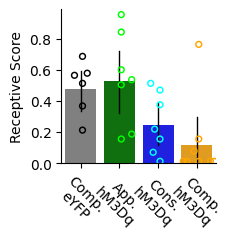

In [11]:
variable = 'Receptive_score'
figure_key = 'S10F'

fig,axs = plt.subplots(1,1,figsize = (2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
            palette = ['gray','green','blue','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq'],
        facecolors='none',palette = ['black','lime','cyan','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('Receptive Score')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Comp.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Comp.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Comp.\neYFP','App.\nhM3Dq','Cons.\nhM3Dq','Comp.\nhM3Dq'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [12]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
app = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Appetitive_hM3Dq',variable].values
cons = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Consummatory_hM3Dq',variable].values
comp = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values


statistic_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cons,cnt_cons_p = stats.mannwhitneyu(cnt,cons)
statistic_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)

#__,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_cons_p,cnt_comp_p,]
statistics = [statistic_app,statistic_cons,statistic_comp]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Consummatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = homecage_summary_df.loc[homecage_summary_df.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = homecage_summary_df.loc[homecage_summary_df.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Receptive_score
Control vs Appetitive, 1.0, False
Control vs Consummatory, 0.18878430886890682, False
Control vs Post_ejaculatory, 0.06256600345271464, False
#####


# Conditional place preference analysis

In [13]:
# Read the meta data
metadf = pd.read_csv(os.path.join(metapath,"TRAP_DREADD_CPP_meta.csv"),index_col = False)

In [14]:
# Read the result data exported from Ethovision
behaviordf = pd.read_csv(os.path.join(datapath,"CPP_behaviordf.csv"),index_col = False)


In [15]:
# Subset the data frame to post and pre results
pretestdf = behaviordf.loc[behaviordf.Session == 'Pre-test',['ID','Clean_zone','Conditioned', 'Stim','State', 'Group','Stim_Group',
        'CNO_side',
                                             'Distance moved','Velocity','Zone_Frequency','Zone_Cumulative Duration','Zone_Latency']]
posttestdf = behaviordf.loc[behaviordf.Session == 'Post-test',['ID','Clean_zone','Conditioned', 'Stim','State', 'Group','Stim_Group',
          'CNO_side',
                                             'Distance moved','Velocity','Zone_Frequency','Zone_Cumulative Duration','Zone_Latency']]

In [16]:
# Calculate the Post - Pre results
meta_columns = ['ID','Clean_zone','Conditioned', 'State', 'Stim','Group','Stim_Group','CNO_side']
variable_columns = ['Distance moved','Velocity','Zone_Frequency','Zone_Cumulative Duration','Zone_Latency']
deltatestdf = posttestdf.set_index(meta_columns) - pretestdf.set_index(meta_columns)
deltatestdf = deltatestdf.reset_index()

## Figure S10H

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\1446438488.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = deltatestdf[deltatestdf.Conditioned],


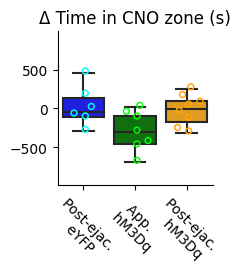

In [17]:
variable = 'Zone_Cumulative Duration'
figure_key = 'S10H'

colors = ['blue','green','orange']

v = np.round(deltatestdf[deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq'][variable].std())*5
fig,axs= plt.subplots(1,1,figsize= (2,2),sharex = True,sharey = True)
sns.swarmplot(data = deltatestdf[deltatestdf.Conditioned],
            x = 'Stim_Group',y = variable,order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Post_ejaculatory_hM3Dq'],ax = axs,
            facecolors='none',palette = ['cyan','lime','orange'], marker="$\circ$", ec="face",s = 8)
sns.boxplot(data = deltatestdf[deltatestdf.Conditioned],
            x = 'Stim_Group',y = variable,order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Post_ejaculatory_hM3Dq'],ax = axs,
            palette = ['blue','green','orange'])
axs.set_ylim(-v,v)
axs.set_xlabel('')
axs.set_ylabel('')
axs.set_title(u'Δ Time in CNO zone (s)')
axs.set_xticklabels(['Post-ejac. \n eYFP','App. \n hM3Dq','Post-ejac. \n hM3Dq'],rotation = -45)
sns.despine()
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [18]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Post_ejaculatory_eYFP'),variable].values
app = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Appetitive_hM3Dq'),variable].values
comp = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq'),variable].values

statistic_cnt_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cnt_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)
statistic_comp_app,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_comp_p,comp_app_p]
statistics = [statistic_cnt_app,statistic_cnt_comp,statistic_comp_app]
# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Post_ejaculatory vs Appetitive',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = deltatestdf.loc[deltatestdf.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = deltatestdf.loc[deltatestdf.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
cnt = deltatestdf.loc[deltatestdf.Stim_Group == 'Appetitive_hM3Dq',variable].values
test = deltatestdf.loc[deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values
n_1 = len(cnt)
n_2 = len(test)

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'Appetitive_hM3Dq vs Post_ejaculatory_hM3Dq',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistics[idx],
    'p Value': corr_pvalues[idx]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Zone_Cumulative Duration
Control vs Appetitive, 0.22027972027972026, False
Control vs Post_ejaculatory, 1.0, False
Post_ejaculatory vs Appetitive, 0.16223776223776223, False
#####


## Figure S10I

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\2751461841.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = deltatestdf[deltatestdf.Conditioned],


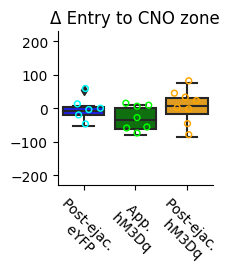

In [19]:
variable = 'Zone_Frequency'
figure_key = 'S10I'

colors = ['blue','green','orange']

v = np.round(deltatestdf[deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq'][variable].std())*5
fig,axs= plt.subplots(1,1,figsize= (2,2),sharex = True,sharey = True)
sns.swarmplot(data = deltatestdf[deltatestdf.Conditioned],
            x = 'Stim_Group',y = variable,order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Post_ejaculatory_hM3Dq'],ax = axs,
            facecolors='none',palette = ['cyan','lime','orange'], marker="$\circ$", ec="face",s = 8)
sns.boxplot(data = deltatestdf[deltatestdf.Conditioned],
            x = 'Stim_Group',y = variable,order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Post_ejaculatory_hM3Dq'],ax = axs,
            palette = ['blue','green','orange'])
axs.set_ylim(-v,v)
axs.set_xlabel('')
axs.set_ylabel('')
axs.set_title(u'Δ Entry to CNO zone')
axs.set_xticklabels(['Post-ejac. \n eYFP','App. \n hM3Dq','Post-ejac. \n hM3Dq'],rotation = -45)
sns.despine()
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [20]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Post_ejaculatory_eYFP'),variable].values
app = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Appetitive_hM3Dq'),variable].values
comp = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq'),variable].values

statistic_cnt_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cnt_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)
statistic_comp_app,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_comp_p,comp_app_p]
statistics = [statistic_cnt_app,statistic_cnt_comp,statistic_comp_app]
# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Post_ejaculatory vs Appetitive',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = deltatestdf.loc[deltatestdf.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = deltatestdf.loc[deltatestdf.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
cnt = deltatestdf.loc[deltatestdf.Stim_Group == 'Appetitive_hM3Dq',variable].values
test = deltatestdf.loc[deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values
n_1 = len(cnt)
n_2 = len(test)

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'Appetitive_hM3Dq vs Post_ejaculatory_hM3Dq',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistics[idx],
    'p Value': corr_pvalues[idx]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Zone_Frequency
Control vs Appetitive, 1.0, False
Control vs Post_ejaculatory, 1.0, False
Post_ejaculatory vs Appetitive, 0.6955710955710956, False
#####


## Figure S10J

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_28168\1039700536.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = deltatestdf[deltatestdf.Conditioned],


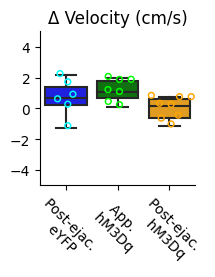

In [21]:
variable = 'Velocity'
figure_key = 'S10J'

colors = ['blue','green','orange']

v = np.round(deltatestdf[deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq'][variable].std())*5
fig,axs= plt.subplots(1,1,figsize= (2,2),sharex = True,sharey = True)
sns.swarmplot(data = deltatestdf[deltatestdf.Conditioned],
            x = 'Stim_Group',y = variable,order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Post_ejaculatory_hM3Dq'],ax = axs,
            facecolors='none',palette = ['cyan','lime','orange'], marker="$\circ$", ec="face",s = 8)
sns.boxplot(data = deltatestdf[deltatestdf.Conditioned],
            x = 'Stim_Group',y = variable,order = ['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Post_ejaculatory_hM3Dq'],ax = axs,
            palette = ['blue','green','orange'])
axs.set_ylim(-v,v)
axs.set_xlabel('')
axs.set_ylabel('')
axs.set_title(u'Δ Velocity (cm/s)')
axs.set_xticklabels(['Post-ejac. \n eYFP','App. \n hM3Dq','Post-ejac. \n hM3Dq'],rotation = -45)
sns.despine()
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [22]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

cnt = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Post_ejaculatory_eYFP'),variable].values
app = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Appetitive_hM3Dq'),variable].values
comp = deltatestdf.loc[(deltatestdf.Conditioned)&(deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq'),variable].values

statistic_cnt_app,cnt_app_p = stats.mannwhitneyu(cnt,app)
statistic_cnt_comp,cnt_comp_p = stats.mannwhitneyu(cnt,comp)
statistic_comp_app,comp_app_p = stats.mannwhitneyu(comp,app)

pvals = [cnt_app_p,cnt_comp_p,comp_app_p]
statistics = [statistic_cnt_app,statistic_cnt_comp,statistic_comp_app]
# Run multiple comparison correction using Bonferoni correction
behavior_multiple_ttests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_ttests

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_ttests, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(variable)
print(', '.join(['Control vs Appetitive',str(corr_pvalues[0]),str(corr_pvalues[0]<0.05)]))
print(', '.join(['Control vs Post_ejaculatory',str(corr_pvalues[1]),str(corr_pvalues[1]<0.05)]))
print(', '.join(['Post_ejaculatory vs Appetitive',str(corr_pvalues[2]),str(corr_pvalues[2]<0.05)]))

print('#####')

for idx, group2 in enumerate(['Appetitive_hM3Dq','Post_ejaculatory_hM3Dq']):
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)
    cnt = deltatestdf.loc[deltatestdf.Stim_Group == 'Post_ejaculatory_eYFP',variable].values
    test = deltatestdf.loc[deltatestdf.Stim_Group == group2,variable].values
    n_1 = len(cnt)
    n_2 = len(test)

    # Append the mannwhitneyu result to manuscript_statistic_file
    mannwhitneyu_data = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Mann-Whitney U rank test',
        'Detail': f'Post_ejaculatory_eYFP vs {group2}',
        'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
        'statistic': statistics[idx],
        'p Value': corr_pvalues[idx]
    }])

    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
cnt = deltatestdf.loc[deltatestdf.Stim_Group == 'Appetitive_hM3Dq',variable].values
test = deltatestdf.loc[deltatestdf.Stim_Group == 'Post_ejaculatory_hM3Dq',variable].values
n_1 = len(cnt)
n_2 = len(test)

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'Appetitive_hM3Dq vs Post_ejaculatory_hM3Dq',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistics[idx],
    'p Value': corr_pvalues[idx]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

Velocity
Control vs Appetitive, 1.0, False
Control vs Post_ejaculatory, 0.8471528471528473, False
Post_ejaculatory vs Appetitive, 0.06153846153846154, False
#####


# Pup retrieval analysis

In [23]:
# Read the meta data
metadf = pd.read_csv(os.path.join(metapath,"TRAP_DREADD_pup_meta.csv"),index_col = False)

In [24]:
# Read the result data exported from Ethovision
behaviordf = pd.read_csv(os.path.join(datapath,"Pup_summary_df.csv"),index_col = False)

## Figure S10L

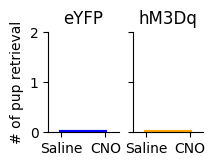

In [25]:
variable = 'Number_of_Retrieval'
figure_key = 'S10L'

fig,axs = plt.subplots(1,2,figsize = (2.0,1.3),sharey = True)
for idx,group in enumerate(['eYFP','hM3Dq']):
    ax = axs[idx]
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],lw = 3)
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],estimator = None,units = 'ID',alpha = 0.6,lw = 1)      

    #ax.set_ylim(0,)

    ax.set_xlim(1.3,-0.3)
    ax.set_title(group)
    ax.set_xlabel('')
sns.despine()
axs[0].set_ylabel('# of pup retrieval')
axs[0].set_ylim(0,2)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [26]:
#perform two-way Wilcoxon
from scipy.stats import wilcoxon

x = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    eYFP_pvalue = 1
    eYFP_stats = 0
    print('eYFP: ','WARNING, all values are zero')
else:
    eYFP_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    eYFP_stats,eYFP_pvalue = eYFP_wilcoxon_stats




x = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    hM3Dq_pvalue = 1
    hM3Dq_stats = 0
    print('hM3Dq: ','WARNING, all values are zero')
else:
    hM3Dq_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    hM3Dq_stats,hM3Dq_pvalue = hM3Dq_wilcoxon_stats

pvals = [eYFP_pvalue,hM3Dq_pvalue]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_wilcoxontests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_wilcoxontests


print('eYFP',corr_pvalues[0])
print('hM3Dq',corr_pvalues[1])

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_wilcoxontests, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'eYFP; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': eYFP_stats,
    'p Value': corr_pvalues[0]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'hM3Dq; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': hM3Dq_stats,
    'p Value': corr_pvalues[1]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)


eYFP:  WARNING, all values are zero
hM3Dq:  WARNING, all values are zero
eYFP 1.0
hM3Dq 1.0


## Figure S10M

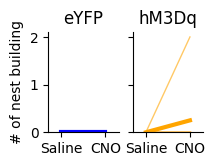

In [27]:
variable = 'Number_of_Nest'
figure_key = 'S10M'

fig,axs = plt.subplots(1,2,figsize = (2.0,1.3),sharey = True)
for idx,group in enumerate(['eYFP','hM3Dq']):
    ax = axs[idx]
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],lw = 3)
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],estimator = None,units = 'ID',alpha = 0.6,lw = 1)      

    #ax.set_ylim(0,)
    ax.set_xlim(1.3,-0.3)
    ax.set_title(group)
    ax.set_xlabel('')
sns.despine()
axs[0].set_ylabel('# of nest building')
axs[0].set_ylim(0,)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [28]:
#perform two-way Wilcoxon
from scipy.stats import wilcoxon

x = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    eYFP_pvalue = 1
    eYFP_stats = 0
    print('eYFP: ','WARNING, all values are zero')
else:
    eYFP_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    eYFP_stats,eYFP_pvalue = eYFP_wilcoxon_stats




x = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    hM3Dq_pvalue = 1
    hM3Dq_stats = 0
    print('hM3Dq: ','WARNING, all values are zero')
else:
    hM3Dq_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    hM3Dq_stats,hM3Dq_pvalue = hM3Dq_wilcoxon_stats

pvals = [eYFP_pvalue,hM3Dq_pvalue]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_wilcoxontests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_wilcoxontests


print('eYFP',corr_pvalues[0])
print('hM3Dq',corr_pvalues[1])

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_wilcoxontests, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'eYFP; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': eYFP_stats,
    'p Value': corr_pvalues[0]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'hM3Dq; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': hM3Dq_stats,
    'p Value': corr_pvalues[1]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)


eYFP:  WARNING, all values are zero
eYFP 1.0
hM3Dq 0.6346210157258283


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## Figure S10N

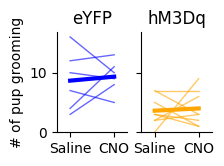

In [29]:
variable = 'Number_of_Grooming'
figure_key = 'S10N'

fig,axs = plt.subplots(1,2,figsize = (2.0,1.3),sharey = True)
for idx,group in enumerate(['eYFP','hM3Dq']):
    ax = axs[idx]
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],lw = 3)
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],estimator = None,units = 'ID',alpha = 0.6,lw = 1)      

    #ax.set_ylim(0,)
    ax.set_xlim(1.3,-0.3)
    ax.set_title(group)
    ax.set_xlabel('')
sns.despine()
axs[0].set_ylabel('# of pup grooming')
axs[0].set_ylim(0,)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [30]:
#perform two-way Wilcoxon
from scipy.stats import wilcoxon

x = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    eYFP_pvalue = 1
    eYFP_stats = 0
    print('eYFP: ','WARNING, all values are zero')
else:
    eYFP_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    eYFP_stats,eYFP_pvalue = eYFP_wilcoxon_stats




x = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    hM3Dq_pvalue = 1
    hM3Dq_stats = 0
    print('hM3Dq: ','WARNING, all values are zero')
else:
    hM3Dq_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    hM3Dq_stats,hM3Dq_pvalue = hM3Dq_wilcoxon_stats

pvals = [eYFP_pvalue,hM3Dq_pvalue]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_wilcoxontests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_wilcoxontests


print('eYFP',corr_pvalues[0])
print('hM3Dq',corr_pvalues[1])

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_wilcoxontests, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'eYFP; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': eYFP_stats,
    'p Value': corr_pvalues[0]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'hM3Dq; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': hM3Dq_stats,
    'p Value': corr_pvalues[1]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)


eYFP 1.0
hM3Dq 1.0


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## Figure S10O

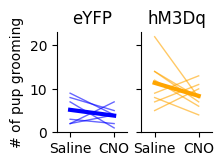

In [31]:
variable = 'Number_of_Sniff'
figure_key = 'S10O'

fig,axs = plt.subplots(1,2,figsize = (2.0,1.3),sharey = True)
for idx,group in enumerate(['eYFP','hM3Dq']):
    ax = axs[idx]
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],lw = 3)
    sns.lineplot(data = behaviordf[behaviordf.Group == group], x = 'State',y = variable,ax = ax,err_style = None,\
                    color = ['blue','orange'][idx],estimator = None,units = 'ID',alpha = 0.6,lw = 1)      

    #ax.set_ylim(0,)
    ax.set_xlim(1.3,-0.3)
    ax.set_title(group)
    ax.set_xlabel('')
sns.despine()
axs[0].set_ylabel('# of pup grooming')
axs[0].set_ylim(0,)
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [32]:
#perform two-way Wilcoxon
from scipy.stats import wilcoxon

x = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'eYFP')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    eYFP_pvalue = 1
    eYFP_stats = 0
    print('eYFP: ','WARNING, all values are zero')
else:
    eYFP_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    eYFP_stats,eYFP_pvalue = eYFP_wilcoxon_stats




x = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'Saline'),variable].values
y = behaviordf.loc[(behaviordf.Group == 'hM3Dq')&(behaviordf.State == 'CNO'),variable].values
if all(x == 0) & all(y == 0):
    hM3Dq_pvalue = 1
    hM3Dq_stats = 0
    print('hM3Dq: ','WARNING, all values are zero')
else:
    hM3Dq_wilcoxon_stats = wilcoxon(
        x = x,
        y = y)
    hM3Dq_stats,hM3Dq_pvalue = hM3Dq_wilcoxon_stats

pvals = [eYFP_pvalue,hM3Dq_pvalue]

# Run multiple comparison correction using Bonferoni correction
behavior_multiple_wilcoxontests = multitest.multipletests(pvals,method = 'bonferroni')
(significance,corr_pvalues,__,__) = behavior_multiple_wilcoxontests


print('eYFP',corr_pvalues[0])
print('hM3Dq',corr_pvalues[1])

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_multiple_ttests.pickle'), 'wb') as handle:
    pickle.dump(behavior_multiple_wilcoxontests, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'eYFP; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': eYFP_stats,
    'p Value': corr_pvalues[0]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)

# Append the wilcoxon result
wilcoxon_stats = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'hM3Dq; Saline vs CNO',
    'statistic description': f'W(n={len(x)})',  # Showing "n" for each group
    'statistic': hM3Dq_stats,
    'p Value': corr_pvalues[1]
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_stats], ignore_index=True)


eYFP 1.0
hM3Dq 0.390625


In [33]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)